This is analyzing the evolution of gender representation in Olympic Sports. This involves examining historical data and trends to understand how gender equality has progressed over time. 


## Hypothesis Generation
1. Female atlethes participation has improved over time reflecting broader trends in gender equality 
2. The number of events readily available to female athletes has increased more rapidly in recent decades compared to earlier periods 
3. Sports that have been previously dominated by men have seen slower increases in female participation compared to sports that traditionally have higher female participation. 

In [1]:
#loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing datasets
athlete_df = pd.read_csv('olympic_athletes.csv')
athlete_df.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


In [3]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75904 entries, 0 to 75903
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   athlete_url           75904 non-null  object 
 1   athlete_full_name     75904 non-null  object 
 2   games_participations  75904 non-null  int64  
 3   first_game            75882 non-null  object 
 4   athlete_year_birth    73448 non-null  float64
 5   athlete_medals        15352 non-null  object 
 6   bio                   22842 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.1+ MB


In [4]:
host_df = pd.read_csv('olympic_hosts.csv')
host_df.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


In [7]:
host_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_slug        53 non-null     object
 1   game_end_date    53 non-null     object
 2   game_start_date  53 non-null     object
 3   game_location    53 non-null     object
 4   game_name        53 non-null     object
 5   game_season      53 non-null     object
 6   game_year        53 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.0+ KB


In [10]:
medal_df = pd.read_csv('olympic_medals.csv')
medal_df.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [8]:
medal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       21697 non-null  object
 1   slug_game              21697 non-null  object
 2   event_title            21697 non-null  object
 3   event_gender           21697 non-null  object
 4   medal_type             21697 non-null  object
 5   participant_type       21697 non-null  object
 6   participant_title      6584 non-null   object
 7   athlete_url            17027 non-null  object
 8   athlete_full_name      18073 non-null  object
 9   country_name           21697 non-null  object
 10  country_code           20195 non-null  object
 11  country_3_letter_code  21697 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


In [13]:
results_df = pd.read_csv('olympic_results.csv')
results_df.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [11]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   discipline_title       162804 non-null  object
 1   event_title            162804 non-null  object
 2   slug_game              162804 non-null  object
 3   participant_type       162804 non-null  object
 4   medal_type             20206 non-null   object
 5   athletes               7976 non-null    object
 6   rank_equal             32526 non-null   object
 7   rank_position          158926 non-null  object
 8   country_name           162804 non-null  object
 9   country_code           157768 non-null  object
 10  country_3_letter_code  162804 non-null  object
 11  athlete_url            129991 non-null  object
 12  athlete_full_name      141646 non-null  object
 13  value_unit             78646 non-null   object
 14  value_type             90049 non-null   object
dtype

In [14]:
#Athlete's dataset
athlete_df.describe(include='all')

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
count,75904,75904,75904.000000,75882,73448.000000,15352,22842
unique,75900,75480,NaN,53,NaN,170,22530
top,https://olympics.com/en/athletes/mariana-pajon,Ivan IVANOV,NaN,Rio 2016,NaN,\n\n\n1\n\nB\n\n,\n\n\nPersonal Best: Mar – unknown.\n\n\n\n\n\n
freq,2,4,NaN,4111,NaN,4209,110
mean,NaN,NaN,1.535874,NaN,1961.619377,NaN,NaN
std,NaN,NaN,0.854563,NaN,28.129576,NaN,NaN
min,NaN,NaN,0.000000,NaN,1836.000000,NaN,NaN
25%,NaN,NaN,1.000000,NaN,1946.000000,NaN,NaN
50%,NaN,NaN,1.000000,NaN,1968.000000,NaN,NaN
75%,NaN,NaN,2.000000,NaN,1983.000000,NaN,NaN


In [15]:
athlete_df.isna().sum()

athlete_url                 0
athlete_full_name           0
games_participations        0
first_game                 22
athlete_year_birth       2456
athlete_medals          60552
bio                     53062
dtype: int64

In [16]:
medal_df.isna().sum()

discipline_title             0
slug_game                    0
event_title                  0
event_gender                 0
medal_type                   0
participant_type             0
participant_title        15113
athlete_url               4670
athlete_full_name         3624
country_name                 0
country_code              1502
country_3_letter_code        0
dtype: int64

In [20]:
#join tables
data = pd.merge(athlete_df,medal_df, on=('athlete_url','athlete_full_name'))
data.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,country_name,country_code,country_3_letter_code
0,https://olympics.com/en/athletes/matt-graham,Matt GRAHAM,3,Sochi 2014,1994.0,\n\n\n1\n\nS\n\n,NaN,Freestyle Skiing,pyeongchang-2018,Men’s Moguls,Men,SILVER,Athlete,NaN,Australia,AU,AUS
1,https://olympics.com/en/athletes/ikuma-horishima,Ikuma HORISHIMA,2,PyeongChang 2018,1997.0,\n\n\n1\n\nB\n\n,NaN,Freestyle Skiing,beijing-2022,Men's Moguls,Men,BRONZE,Athlete,NaN,Japan,JP,JPN
2,https://olympics.com/en/athletes/daichi-hara,Daichi HARA,2,PyeongChang 2018,1997.0,\n\n\n1\n\nB\n\n,NaN,Freestyle Skiing,pyeongchang-2018,Men’s Moguls,Men,BRONZE,Athlete,NaN,Japan,JP,JPN
3,https://olympics.com/en/athletes/mikael-kingsbury,Mikael KINGSBURY,3,Sochi 2014,1992.0,\n\n\n1\n\nG\n\n\n\n2\n\nS\n\n,\n\n\nIn the period between his elite debut in...,Freestyle Skiing,beijing-2022,Men's Moguls,Men,SILVER,Athlete,NaN,Canada,CA,CAN
4,https://olympics.com/en/athletes/mikael-kingsbury,Mikael KINGSBURY,3,Sochi 2014,1992.0,\n\n\n1\n\nG\n\n\n\n2\n\nS\n\n,\n\n\nIn the period between his elite debut in...,Freestyle Skiing,pyeongchang-2018,Men’s Moguls,Men,GOLD,Athlete,NaN,Canada,CA,CAN


In [21]:
data['Full_Name'] = data['athlete_full_name'].str.title()
data.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,country_name,country_code,country_3_letter_code,Full_Name
0,https://olympics.com/en/athletes/matt-graham,Matt GRAHAM,3,Sochi 2014,1994.0,\n\n\n1\n\nS\n\n,NaN,Freestyle Skiing,pyeongchang-2018,Men’s Moguls,Men,SILVER,Athlete,NaN,Australia,AU,AUS,Matt Graham
1,https://olympics.com/en/athletes/ikuma-horishima,Ikuma HORISHIMA,2,PyeongChang 2018,1997.0,\n\n\n1\n\nB\n\n,NaN,Freestyle Skiing,beijing-2022,Men's Moguls,Men,BRONZE,Athlete,NaN,Japan,JP,JPN,Ikuma Horishima
2,https://olympics.com/en/athletes/daichi-hara,Daichi HARA,2,PyeongChang 2018,1997.0,\n\n\n1\n\nB\n\n,NaN,Freestyle Skiing,pyeongchang-2018,Men’s Moguls,Men,BRONZE,Athlete,NaN,Japan,JP,JPN,Daichi Hara
3,https://olympics.com/en/athletes/mikael-kingsbury,Mikael KINGSBURY,3,Sochi 2014,1992.0,\n\n\n1\n\nG\n\n\n\n2\n\nS\n\n,\n\n\nIn the period between his elite debut in...,Freestyle Skiing,beijing-2022,Men's Moguls,Men,SILVER,Athlete,NaN,Canada,CA,CAN,Mikael Kingsbury
4,https://olympics.com/en/athletes/mikael-kingsbury,Mikael KINGSBURY,3,Sochi 2014,1992.0,\n\n\n1\n\nG\n\n\n\n2\n\nS\n\n,\n\n\nIn the period between his elite debut in...,Freestyle Skiing,pyeongchang-2018,Men’s Moguls,Men,GOLD,Athlete,NaN,Canada,CA,CAN,Mikael Kingsbury


In [26]:
data.isna().sum()

athlete_url                  0
athlete_full_name            0
games_participations         0
first_game                   1
athlete_year_birth         183
athlete_medals               9
bio                       6804
discipline_title             0
slug_game                    0
event_title                  0
event_gender                 0
medal_type                   0
participant_type             0
participant_title        14186
country_name                 0
country_code              1038
country_3_letter_code        0
Full_Name                    0
dtype: int64

In [22]:
data['athlete_medals'].head(n=50)

0                                 \n\n\n1\n\nS\n\n
1                                 \n\n\n1\n\nB\n\n
2                                 \n\n\n1\n\nB\n\n
3                   \n\n\n1\n\nG\n\n\n\n2\n\nS\n\n
4                   \n\n\n1\n\nG\n\n\n\n2\n\nS\n\n
5                   \n\n\n1\n\nG\n\n\n\n2\n\nS\n\n
6                                 \n\n\n1\n\nG\n\n
7                                 \n\n\n1\n\nB\n\n
8                   \n\n\n1\n\nG\n\n\n\n1\n\nB\n\n
9                   \n\n\n1\n\nG\n\n\n\n1\n\nB\n\n
10                  \n\n\n2\n\nG\n\n\n\n1\n\nS\n\n
11                  \n\n\n2\n\nG\n\n\n\n1\n\nS\n\n
12                  \n\n\n2\n\nG\n\n\n\n1\n\nS\n\n
13                  \n\n\n1\n\nS\n\n\n\n1\n\nB\n\n
14                  \n\n\n1\n\nS\n\n\n\n1\n\nB\n\n
15                                \n\n\n1\n\nS\n\n
16                                \n\n\n1\n\nG\n\n
17                                \n\n\n1\n\nB\n\n
18                                \n\n\n1\n\nB\n\n
19                  \n\n\n2\n\n

In [29]:
data['cleaned_medals'] = data['athlete_medals'].str.replace('\n', '', regex = False)
print(data['cleaned_medals'])

0          1S
1          1B
2          1B
3        1G2S
4        1G2S
         ... 
16974    1S1B
16975      1G
16976      1B
16977      1G
16978      1B
Name: cleaned_medals, Length: 16979, dtype: object


In [31]:
#Extracting Gold medal
data['Gold'] = data['cleaned_medals'].str.extract(r'(\d+)G')[0].fillna(0).astype(int)
#Extracting Silver medal
data['Silver'] = data['cleaned_medals'].str.extract(r'(\d+)S')[0].fillna(0).astype(int)
#Extracting Bronze medal
data['Bronze'] = data['cleaned_medals'].str.extract(r'(\d+)B')[0].fillna(0).astype(int)
data.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio,discipline_title,slug_game,event_title,...,participant_type,participant_title,country_name,country_code,country_3_letter_code,Full_Name,cleaned_medals,Gold,Silver,Bronze
0,https://olympics.com/en/athletes/matt-graham,Matt GRAHAM,3,Sochi 2014,1994.0,\n\n\n1\n\nS\n\n,NaN,Freestyle Skiing,pyeongchang-2018,Men’s Moguls,...,Athlete,NaN,Australia,AU,AUS,Matt Graham,1S,0,1,0
1,https://olympics.com/en/athletes/ikuma-horishima,Ikuma HORISHIMA,2,PyeongChang 2018,1997.0,\n\n\n1\n\nB\n\n,NaN,Freestyle Skiing,beijing-2022,Men's Moguls,...,Athlete,NaN,Japan,JP,JPN,Ikuma Horishima,1B,0,0,1
2,https://olympics.com/en/athletes/daichi-hara,Daichi HARA,2,PyeongChang 2018,1997.0,\n\n\n1\n\nB\n\n,NaN,Freestyle Skiing,pyeongchang-2018,Men’s Moguls,...,Athlete,NaN,Japan,JP,JPN,Daichi Hara,1B,0,0,1
3,https://olympics.com/en/athletes/mikael-kingsbury,Mikael KINGSBURY,3,Sochi 2014,1992.0,\n\n\n1\n\nG\n\n\n\n2\n\nS\n\n,\n\n\nIn the period between his elite debut in...,Freestyle Skiing,beijing-2022,Men's Moguls,...,Athlete,NaN,Canada,CA,CAN,Mikael Kingsbury,1G2S,1,2,0
4,https://olympics.com/en/athletes/mikael-kingsbury,Mikael KINGSBURY,3,Sochi 2014,1992.0,\n\n\n1\n\nG\n\n\n\n2\n\nS\n\n,\n\n\nIn the period between his elite debut in...,Freestyle Skiing,pyeongchang-2018,Men’s Moguls,...,Athlete,NaN,Canada,CA,CAN,Mikael Kingsbury,1G2S,1,2,0


In [32]:
#dropping unnecessary columns
columns_to_drop = ['athlete_url','athlete_full_name','athlete_medals','bio','country_code','cleaned_medals']
data.drop(columns = columns_to_drop,inplace = True)

In [33]:
data.head()

,games_participations,first_game,athlete_year_birth,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,country_name,country_3_letter_code,Full_Name,Gold,Silver,Bronze
0,3,Sochi 2014,1994.0,Freestyle Skiing,pyeongchang-2018,Men’s Moguls,Men,SILVER,Athlete,NaN,Australia,AUS,Matt Graham,0,1,0
1,2,PyeongChang 2018,1997.0,Freestyle Skiing,beijing-2022,Men's Moguls,Men,BRONZE,Athlete,NaN,Japan,JPN,Ikuma Horishima,0,0,1
2,2,PyeongChang 2018,1997.0,Freestyle Skiing,pyeongchang-2018,Men’s Moguls,Men,BRONZE,Athlete,NaN,Japan,JPN,Daichi Hara,0,0,1
3,3,Sochi 2014,1992.0,Freestyle Skiing,beijing-2022,Men's Moguls,Men,SILVER,Athlete,NaN,Canada,CAN,Mikael Kingsbury,1,2,0
4,3,Sochi 2014,1992.0,Freestyle Skiing,pyeongchang-2018,Men’s Moguls,Men,GOLD,Athlete,NaN,Canada,CAN,Mikael Kingsbury,1,2,0


In [36]:
new_data = data.merge(host_df, how = 'left', left_on = 'slug_game', right_on = 'game_slug')
new_data.head()

,games_participations,first_game,athlete_year_birth,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,...,Gold,Silver,Bronze,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,3,Sochi 2014,1994.0,Freestyle Skiing,pyeongchang-2018,Men’s Moguls,Men,SILVER,Athlete,NaN,...,0,1,0,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
1,2,PyeongChang 2018,1997.0,Freestyle Skiing,beijing-2022,Men's Moguls,Men,BRONZE,Athlete,NaN,...,0,0,1,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
2,2,PyeongChang 2018,1997.0,Freestyle Skiing,pyeongchang-2018,Men’s Moguls,Men,BRONZE,Athlete,NaN,...,0,0,1,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,3,Sochi 2014,1992.0,Freestyle Skiing,beijing-2022,Men's Moguls,Men,SILVER,Athlete,NaN,...,1,2,0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
4,3,Sochi 2014,1992.0,Freestyle Skiing,pyeongchang-2018,Men’s Moguls,Men,GOLD,Athlete,NaN,...,1,2,0,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018


In [37]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16979 entries, 0 to 16978
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   games_participations   16979 non-null  int64  
 1   first_game             16978 non-null  object 
 2   athlete_year_birth     16796 non-null  float64
 3   discipline_title       16979 non-null  object 
 4   slug_game              16979 non-null  object 
 5   event_title            16979 non-null  object 
 6   event_gender           16979 non-null  object 
 7   medal_type             16979 non-null  object 
 8   participant_type       16979 non-null  object 
 9   participant_title      2793 non-null   object 
 10  country_name           16979 non-null  object 
 11  country_3_letter_code  16979 non-null  object 
 12  Full_Name              16979 non-null  object 
 13  Gold                   16979 non-null  int32  
 14  Silver                 16979 non-null  int32  
 15  Br

In [38]:
#remove join and unsued columns
new_data.drop(columns = ['game_slug','game_end_date','game_start_date','participant_title'], inplace=True)

In [40]:
new_data.drop(columns='slug_game',inplace= True)

In [41]:
new_data.shape

(16979, 18)

In [43]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16979 entries, 0 to 16978
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   games_participations   16979 non-null  int64  
 1   first_game             16978 non-null  object 
 2   athlete_year_birth     16796 non-null  float64
 3   discipline_title       16979 non-null  object 
 4   event_title            16979 non-null  object 
 5   event_gender           16979 non-null  object 
 6   medal_type             16979 non-null  object 
 7   participant_type       16979 non-null  object 
 8   country_name           16979 non-null  object 
 9   country_3_letter_code  16979 non-null  object 
 10  Full_Name              16979 non-null  object 
 11  Gold                   16979 non-null  int32  
 12  Silver                 16979 non-null  int32  
 13  Bronze                 16979 non-null  int32  
 14  game_location          16979 non-null  object 
 15  ga

In [44]:
new_data['country_name'].unique()

array(['Australia', 'Japan', 'Canada', 'Sweden', 'France', 'New Zealand',
       'United States of America', 'Norway', 'ROC',
       'Olympic Athletes from Russia', 'Switzerland',
       "People's Republic of China", 'Estonia', 'Kazakhstan', 'Germany',
       'Ukraine', 'Belarus', 'Italy', 'Netherlands', 'Republic of Korea',
       'Belgium', 'Hungary', 'Spain', 'Slovenia', 'Russian Federation',
       'Austria', 'Finland', 'Czech Republic', 'Poland', 'Croatia',
       'Slovakia', 'Great Britain', 'Latvia', 'Cuba', 'Serbia',
       'San Marino', 'Greece', 'Mongolia', 'Georgia', 'Soviet Union',
       'Bulgaria', 'Brazil', 'Islamic Republic of Iran', 'Vietnam',
       'Kuwait', 'Denmark', 'Mexico', 'Malaysia', 'Republic of Moldova',
       'Portugal', 'Ecuador', 'Azerbaijan', 'Ireland', 'Philippines',
       'Uzbekistan', 'Ghana', 'Thailand', 'Turkey', 'India', 'Colombia',
       'Chinese Taipei', 'Venezuela', 'Armenia', 'Bermuda',
       'South Africa', 'Singapore', 'Jordan', 'Egypt', 

In [48]:
#replace long country names with short analogs
country_dict = {
    'German Democratic Republic (Germany)': 'Germany',
    "People's Republic of China": 'China',
    "Democratic People's Republic of Korea": 'North Korea',
    "Russian Federation": 'Russia',
    "Republic of Korea" :'South Korea',
    "Islamic Republic of Iran" :'Iran',
    'United Republic of Tanzania':'Tanzania',
    "United States of America" : 'USA',
    "Federal Republic of Germany": 'Germany',
    'Syrian Arab Republic' : 'Syria'
    
}

new_data['country_name'] = new_data['country_name'].replace(country_dict)

In [49]:
new_data['country_name'].unique()

array(['Australia', 'Japan', 'Canada', 'Sweden', 'France', 'New Zealand',
       'USA', 'Norway', 'ROC', 'Olympic Athletes from Russia',
       'Switzerland', 'China', 'Estonia', 'Kazakhstan', 'Germany',
       'Ukraine', 'Belarus', 'Italy', 'Netherlands', 'South Korea',
       'Belgium', 'Hungary', 'Spain', 'Slovenia', 'Russia', 'Austria',
       'Finland', 'Czech Republic', 'Poland', 'Croatia', 'Slovakia',
       'Great Britain', 'Latvia', 'Cuba', 'Serbia', 'San Marino',
       'Greece', 'Mongolia', 'Georgia', 'Soviet Union', 'Bulgaria',
       'Brazil', 'Iran', 'Vietnam', 'Kuwait', 'Denmark', 'Mexico',
       'Malaysia', 'Republic of Moldova', 'Portugal', 'Ecuador',
       'Azerbaijan', 'Ireland', 'Philippines', 'Uzbekistan', 'Ghana',
       'Thailand', 'Turkey', 'India', 'Colombia', 'Chinese Taipei',
       'Venezuela', 'Armenia', 'Bermuda', 'South Africa', 'Singapore',
       'Jordan', 'Egypt', "Côte d'Ivoire", 'North Macedonia', 'Gabon',
       'Niger', 'Tunisia', 'Israel', 'Hong

In [51]:
new_data.head()

,games_participations,first_game,athlete_year_birth,discipline_title,event_title,event_gender,medal_type,participant_type,country_name,country_3_letter_code,Full_Name,Gold,Silver,Bronze,game_location,game_name,game_season,game_year
0,3,Sochi 2014,1994.0,Freestyle Skiing,Men’s Moguls,Men,SILVER,Athlete,Australia,AUS,Matt Graham,0,1,0,Republic of Korea,PyeongChang 2018,Winter,2018
1,2,PyeongChang 2018,1997.0,Freestyle Skiing,Men's Moguls,Men,BRONZE,Athlete,Japan,JPN,Ikuma Horishima,0,0,1,China,Beijing 2022,Winter,2022
2,2,PyeongChang 2018,1997.0,Freestyle Skiing,Men’s Moguls,Men,BRONZE,Athlete,Japan,JPN,Daichi Hara,0,0,1,Republic of Korea,PyeongChang 2018,Winter,2018
3,3,Sochi 2014,1992.0,Freestyle Skiing,Men's Moguls,Men,SILVER,Athlete,Canada,CAN,Mikael Kingsbury,1,2,0,China,Beijing 2022,Winter,2022
4,3,Sochi 2014,1992.0,Freestyle Skiing,Men’s Moguls,Men,GOLD,Athlete,Canada,CAN,Mikael Kingsbury,1,2,0,Republic of Korea,PyeongChang 2018,Winter,2018


In [52]:
new_data.shape

(16979, 18)

In [53]:
results_df.shape

(162804, 15)

In [57]:
final_data = pd.merge(new_data, results_df, on=['discipline_title','country_name','medal_type'])
final_data.head()

,games_participations,first_game,athlete_year_birth,discipline_title,event_title_x,event_gender,medal_type,participant_type_x,country_name,country_3_letter_code_x,...,participant_type_y,athletes,rank_equal,rank_position,country_code,country_3_letter_code_y,athlete_url,athlete_full_name,value_unit,value_type
0,3,Sochi 2014,1994.0,Freestyle Skiing,Men’s Moguls,Men,SILVER,Athlete,Australia,AUS,...,Athlete,NaN,NaN,2,AU,AUS,https://olympics.com/en/athletes/matt-graham,Matt GRAHAM,82.57,POINTS
1,3,Sochi 2014,1994.0,Freestyle Skiing,Men’s Moguls,Men,SILVER,Athlete,Australia,AUS,...,Athlete,NaN,NaN,2,AU,AUS,https://olympics.com/en/athletes/david-morris,David MORRIS,110.41,POINTS
2,3,Sochi 2014,1994.0,Freestyle Skiing,Men’s Moguls,Men,SILVER,Athlete,Australia,AUS,...,Athlete,NaN,NaN,2,AU,AUS,https://olympics.com/en/athletes/dale-begg-smith,Dale BEGG-SMITH,26.58,POINTS
3,2,PyeongChang 2018,1997.0,Freestyle Skiing,Men's Moguls,Men,BRONZE,Athlete,Japan,JPN,...,Athlete,NaN,False,3,JP,JPN,https://olympics.com/en/athletes/ikuma-horishima,Ikuma HORISHIMA,76.19,POINTS
4,2,PyeongChang 2018,1997.0,Freestyle Skiing,Men's Moguls,Men,BRONZE,Athlete,Japan,JPN,...,Athlete,NaN,NaN,3,JP,JPN,https://olympics.com/en/athletes/daichi-hara,Daichi HARA,82.19,POINTS


In [58]:
final_data.shape

(221927, 30)

In [59]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221927 entries, 0 to 221926
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   games_participations     221927 non-null  int64  
 1   first_game               221927 non-null  object 
 2   athlete_year_birth       220091 non-null  float64
 3   discipline_title         221927 non-null  object 
 4   event_title_x            221927 non-null  object 
 5   event_gender             221927 non-null  object 
 6   medal_type               221927 non-null  object 
 7   participant_type_x       221927 non-null  object 
 8   country_name             221927 non-null  object 
 9   country_3_letter_code_x  221927 non-null  object 
 10  Full_Name                221927 non-null  object 
 11  Gold                     221927 non-null  int32  
 12  Silver                   221927 non-null  int32  
 13  Bronze                   221927 non-null  int32  
 14  game

In [63]:
columns_to_drop= ['event_title_y','participant_type_y','country_3_letter_code_y','athlete_url','athlete_full_name','country_3_letter_code_x']
final_data.drop(columns = columns_to_drop, inplace = True)

In [65]:
final_data.drop(columns=['country_code','value_unit','value_type','slug_game','rank_equal'], inplace = True)

In [71]:
final_data.drop(columns = 'athletes', inplace = True)

In [73]:
final_data = final_data.rename(columns={
    'event_title_x': 'event_title',
    'participant_type_x': 'participant_type'
})


In [74]:
final_data.head()

,games_participations,first_game,athlete_year_birth,discipline_title,event_title,event_gender,medal_type,participant_type,country_name,Full_Name,Gold,Silver,Bronze,game_location,game_name,game_season,game_year,rank_position
0,3,Sochi 2014,1994.0,Freestyle Skiing,Men’s Moguls,Men,SILVER,Athlete,Australia,Matt Graham,0,1,0,Republic of Korea,PyeongChang 2018,Winter,2018,2
1,3,Sochi 2014,1994.0,Freestyle Skiing,Men’s Moguls,Men,SILVER,Athlete,Australia,Matt Graham,0,1,0,Republic of Korea,PyeongChang 2018,Winter,2018,2
2,3,Sochi 2014,1994.0,Freestyle Skiing,Men’s Moguls,Men,SILVER,Athlete,Australia,Matt Graham,0,1,0,Republic of Korea,PyeongChang 2018,Winter,2018,2
3,2,PyeongChang 2018,1997.0,Freestyle Skiing,Men's Moguls,Men,BRONZE,Athlete,Japan,Ikuma Horishima,0,0,1,China,Beijing 2022,Winter,2022,3
4,2,PyeongChang 2018,1997.0,Freestyle Skiing,Men's Moguls,Men,BRONZE,Athlete,Japan,Ikuma Horishima,0,0,1,China,Beijing 2022,Winter,2022,3


In [82]:
final_data['gender'] = final_data['event_gender'].str.strip()
final_data['gender'].value_counts()

gender
Men      147973
Women     67572
Open       4940
Mixed      1442
Name: count, dtype: int64

In [83]:
# Replace values in the gender column, including 'Open' and 'Mixed'
final_data['gender'] = final_data['gender'].replace({
    'Men': 'Male',
    'Women': 'Female',
    'Open': 'Open', 
    'Mixed': 'Mixed'   
})

# Verify the changes
print(final_data['gender'].value_counts())


gender
Male      147973
Female     67572
Open        4940
Mixed       1442
Name: count, dtype: int64


In [88]:
final_data['discipline_title'].unique()
discipline_map={
    "Gymnastics Artistic":"Artistic Gymnastics",
    "Gymnastics Rhythmic":"Rhythmic Gymnastics",
    "Synchronized Swimming":"Artistic Swimming",
    "Equestrian Dressage":"Equestrian",
    "Equestrian Jumping":"Equestrian",
    "Equestrian Eventing":"Equestrian",
    "Trampoline":"Trampoline Gymnastics",
    "Cycling BMX":"Cycling BMX Racing",
    "Short Track Speed Skating": "Short Track"
}
final_data['discipline_title'] = final_data['discipline_title'].replace(discipline_map)

In [89]:
final_data.isna().sum()

games_participations       0
first_game                 0
athlete_year_birth      1836
discipline_title           0
event_title                0
event_gender               0
medal_type                 0
participant_type           0
country_name               0
Full_Name                  0
Gold                       0
Silver                     0
Bronze                     0
game_location              0
game_name                  0
game_season                0
game_year                  0
rank_position              0
gender                     0
dtype: int64

In [90]:
final_data['participant_type'].value_counts()

participant_type
Athlete     198101
GameTeam     23826
Name: count, dtype: int64

In [93]:
final_data.head()

,games_participations,first_game,athlete_year_birth,discipline_title,event_title,event_gender,medal_type,participant_type,country_name,Full_Name,Gold,Silver,Bronze,game_location,game_name,game_season,game_year,rank_position,gender
0,3,Sochi 2014,1994.0,Freestyle Skiing,Men’s Moguls,Men,SILVER,Athlete,Australia,Matt Graham,0,1,0,Republic of Korea,PyeongChang 2018,Winter,2018,2,Male
1,3,Sochi 2014,1994.0,Freestyle Skiing,Men’s Moguls,Men,SILVER,Athlete,Australia,Matt Graham,0,1,0,Republic of Korea,PyeongChang 2018,Winter,2018,2,Male
2,3,Sochi 2014,1994.0,Freestyle Skiing,Men’s Moguls,Men,SILVER,Athlete,Australia,Matt Graham,0,1,0,Republic of Korea,PyeongChang 2018,Winter,2018,2,Male
3,2,PyeongChang 2018,1997.0,Freestyle Skiing,Men's Moguls,Men,BRONZE,Athlete,Japan,Ikuma Horishima,0,0,1,China,Beijing 2022,Winter,2022,3,Male
4,2,PyeongChang 2018,1997.0,Freestyle Skiing,Men's Moguls,Men,BRONZE,Athlete,Japan,Ikuma Horishima,0,0,1,China,Beijing 2022,Winter,2022,3,Male


In [92]:
final_data.groupby('gender')['discipline_title'].sum()

gender
Female    Freestyle SkiingFreestyle SkiingFreestyle Skii...
Male      Freestyle SkiingFreestyle SkiingFreestyle Skii...
Mixed     SnowboardSnowboardSnowboardSnowboardSnowboardS...
Open      EquestrianEquestrianEquestrianEquestrianEquest...
Name: discipline_title, dtype: object

In [95]:
final_data.to_csv('final_data.csv', index=False)

In [96]:
duplicates = final_data[final_data.duplicated()]
print(duplicates)


        games_participations        first_game  athlete_year_birth  \
1                          3        Sochi 2014              1994.0   
2                          3        Sochi 2014              1994.0   
4                          2  PyeongChang 2018              1997.0   
5                          2  PyeongChang 2018              1997.0   
6                          2  PyeongChang 2018              1997.0   
...                      ...               ...                 ...   
221922                     1    Innsbruck 1976              1946.0   
221923                     1    Innsbruck 1976              1946.0   
221924                     1    Innsbruck 1976              1946.0   
221925                     1    Innsbruck 1976              1946.0   
221926                     1    Innsbruck 1976              1946.0   

        discipline_title        event_title event_gender medal_type  \
1       Freestyle Skiing       Men’s Moguls          Men     SILVER   
2       Freestyle

In [97]:
df_cleaned = final_data.drop_duplicates()

In [98]:
df_cleaned.shape

(13231, 19)

In [101]:
df_cleaned.head()

,games_participations,first_game,athlete_year_birth,discipline_title,event_title,event_gender,medal_type,participant_type,country_name,Full_Name,Gold,Silver,Bronze,game_location,game_name,game_season,game_year,rank_position,gender
0,3,Sochi 2014,1994.0,Freestyle Skiing,Men’s Moguls,Men,SILVER,Athlete,Australia,Matt Graham,0,1,0,Republic of Korea,PyeongChang 2018,Winter,2018,2,Male
3,2,PyeongChang 2018,1997.0,Freestyle Skiing,Men's Moguls,Men,BRONZE,Athlete,Japan,Ikuma Horishima,0,0,1,China,Beijing 2022,Winter,2022,3,Male
7,2,PyeongChang 2018,1997.0,Freestyle Skiing,Men’s Moguls,Men,BRONZE,Athlete,Japan,Daichi Hara,0,0,1,Republic of Korea,PyeongChang 2018,Winter,2018,3,Male
11,3,Sochi 2014,1992.0,Freestyle Skiing,Men's Moguls,Men,SILVER,Athlete,Canada,Mikael Kingsbury,1,2,0,China,Beijing 2022,Winter,2022,2,Male
23,3,Sochi 2014,1992.0,Freestyle Skiing,Men’s Moguls,Men,GOLD,Athlete,Canada,Mikael Kingsbury,1,2,0,Republic of Korea,PyeongChang 2018,Winter,2018,1,Male


In [103]:
df_cleaned.to_csv('df_cleaned.csv', index=False)

In [104]:
df_cleaned.shape

(13231, 19)

In [109]:
df_cleaned['gender'].value_counts()

gender
Male      8646
Female    3769
Open       557
Mixed      259
Name: count, dtype: int64

In [110]:
# Filter out irrelevant genders (if needed)
df = df_cleaned[df_cleaned['gender'].isin(['Male', 'Female'])]
df.shape

(12415, 19)

## Data Visualization

In [111]:
participation_counts = df.groupby(['game_year', 'gender']).size().unstack(fill_value=0)
participation_counts

gender,Female,Male
game_year,,
1896,0,82
1900,1,122
1904,0,30
1908,8,172
1912,10,153
1920,14,211
1924,14,229
1928,26,202
1932,19,193


In [112]:
medal_counts = df.groupby(['game_year', 'gender'])[['Gold', 'Silver', 'Bronze']].sum().unstack(fill_value=0)
medal_counts

Gold      Silver      Bronze     
gender    Female Male Female Male Female Male
game_year                                    
1896           0   72      0   51      0   48
1900           2  120      0  102      0   80
1904           0   34      0   25      0   16
1908           3  110      3  101      3  104
1912           7  124      3  104      4   97
1920           9  216     11  179      8  161
1924           5  238      7  224     11  173
1928          13  205     13  180     16  149
1932           9  154     10  130     13  121
1936          24  200     18  170     13  149
1948          42  190     27  165     30  179
1952          70  229     80  181     62  164
1956         108  275     88  225     67  213
1960         126  263     88  211     85  205
1964         178  240    103  232     77  195
1968         109  272     93  240     58  194
1972         118  303    122  245     94  239
1976         171  296    134  223     85  250
1980         149  293    119  265     95  251
1984         108  212    111  214    130  228
1988         219  266    167  236    147  246
1992         193  339    182  293    194  290
1994          63  107     51   86     61   64
1996         155  250    151  195    184  224
1998          72  100     61   82     54   65
2000         191  245    185  201    175  225
2002          74  127     89   92     86   67
2004         206  254    180  219    166  221
2006          90  128     98   84     78   84
2008         165  236    169  221    174  227
2010         124   99    112   73     69   58
2012         179  241    170  211    180  224
2014         150  121    121   92     86   91
2016         188  249    155  214    191  237
2018         153  132    141   91    106   98
2020         216  199    188  198    214  246
2022         119  147     98   99    120   82

<Figure size 1400x700 with 0 Axes>

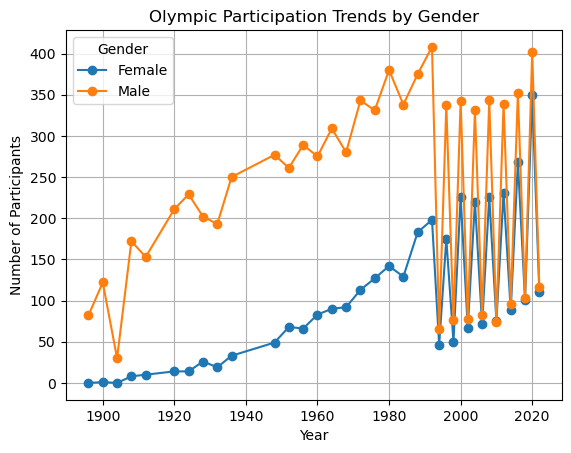

In [114]:
plt.figure(figsize=(14, 7))
participation_counts.plot(kind='line', marker='o')
plt.title('Olympic Participation Trends by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.legend(title='Gender')
plt.grid(True)
plt.show();

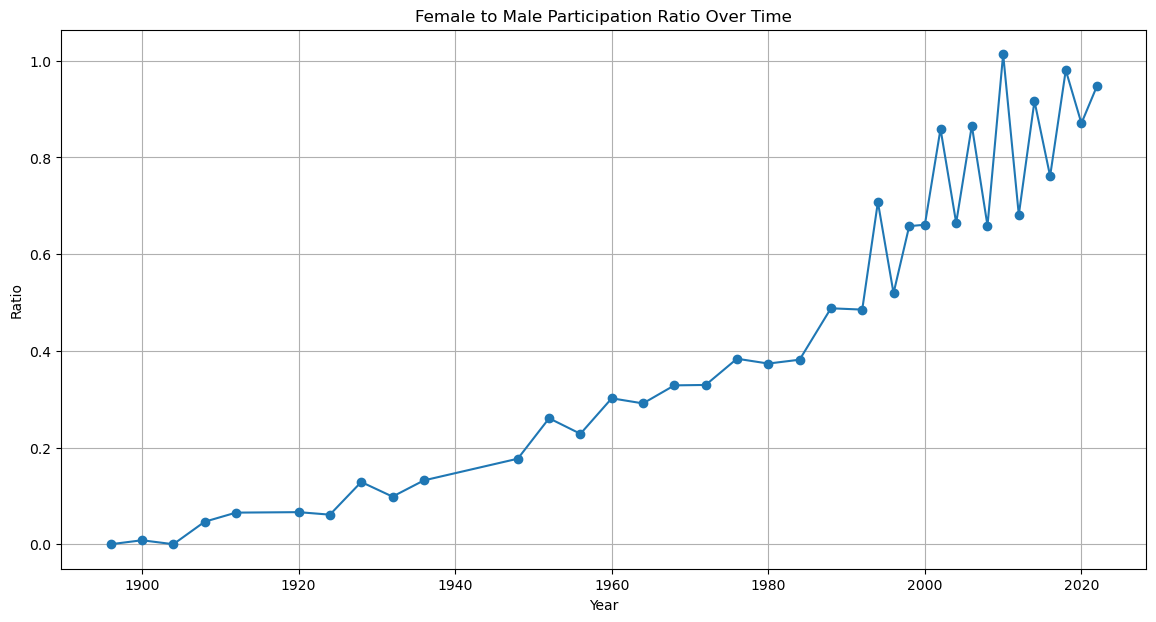

In [116]:
# Calculate gender ratios for equality analysis
ratio = participation_counts['Female'] / participation_counts['Male']

plt.figure(figsize=(14, 7))
ratio.plot(kind='line', marker='o')
plt.title('Female to Male Participation Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.grid(True)
plt.show()